# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [2]:
import pandas as pd 
df_t = pd.read_csv('data/titanic.csv')

In [4]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df_t['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [9]:

df_t['class'].unique()

f = df_t[df_t['class'] == 'First']['fare']
s = df_t[df_t['class'] == 'Second']['fare']
t = df_t[df_t['class'] == 'Third']['fare']


# 등분산성 검정


# 일원배치분산분석

# 대립가설 채택? 사후검정 실시

In [10]:
# 정규성 검정
# 귀무가설 : 정규성을 만족한다. 대립가설 : 정규성을 만족하지 못한다.
import scipy.stats as stats

In [13]:
# 세 집단 모두 정규성을 만족하지 못한다.
print(stats.shapiro(f)) 
print(stats.shapiro(s))
print(stats.shapiro(t))

ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)
ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15)
ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)


In [15]:
stats.kruskal(f,s,t)
# p-value가 0.05 보다 작으므로, 대립가설 채택
# 즉, class에 따른 평균 fare의 차이는 통계학적으로 유의미하다.

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

In [17]:
# 만약 정규성을 만족한다면? 등분산성 검정
# 귀무가설 : 등분산성을 만족한다. 대립가설 : 등분산성을 만족하지 못한다.(집단 별로 분산이 다르다.)
stats.levene(f,s,t)
# 대립가설 채택, 등분산성을 만족하지 못한다.

LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)

In [18]:
# 등분산성 만족 못할 경우 - 추후 재실행

In [20]:
# 만약 정규성, 등분산성을 모두 만족한다면, 일원배치분산분석 진행
stats.f_oneway(f,s,t)
# 대립가설 채택, class에 따른 평균 fare의 차이는 통계적으로 유의미하다.

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

In [23]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data = df_t['fare'], groups = df_t['class'])
th = mc.tukeyhsd(alpha = 0.05)
th.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
First,Second,-63.4925,-0.0,-72.9165,-54.0685,True
First,Third,-70.4791,-0.0,-78.1489,-62.8094,True
Second,Third,-6.9866,0.108,-15.1064,1.1331,False


In [24]:
# class Second, First의 차이는 0.05보다 작으므로 통계학적으로 유의미 하다.
# Second - First가 음수이므로, First일 때가 Second 일때보다 평균 Fare 요금이 더 높다.
# Second - Thrid의 차이는 0.05보다 크므로 없다고 얘기할 수 있다.
# 단, Third-Second 차이는 음수이므로, Thid일 때보다 Second일 때가 평균 Fare 요금이 더 높다고 할 수 있다.


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

In [26]:
df = pd.read_csv('data/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [28]:
df.info() # null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [43]:
s = df['sex']
c = df['class']
f = df['fare']

df_t = df[['sex','class','fare']]
df_t = df_t.rename({'class' : 'Class'}, axis = 1)
df_t

,sex,Class,fare
0,male,Third,7.2500
1,female,First,71.2833
2,female,Third,7.9250
3,female,First,53.1000
4,male,Third,8.0500
...,...,...,...
886,male,Second,13.0000
887,female,First,30.0000
888,female,Third,23.4500
889,male,First,30.0000


In [45]:
# 분산분석 수행 : 정규성 검정, 등분산성 검정은?
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'fare~C(sex)*C(Class)' # class 예약어
model = ols(formula, df_t).fit()
aov_table = anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(Class),7.347122e+05,2.0,242.620968,9.763645e-85
C(sex):C(Class),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


In [46]:
# 교호작용효과 검정 
# 없다/있다 -> 대립가설 채택
# sex와 class에 상호작용효과가 fare에 영향을 미친다.
# 주효과 검정은 의미가 없다.

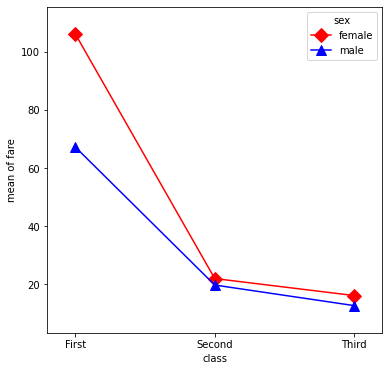

In [48]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(c, s, f, colors=['red','blue'], markers=['D','^'],ms=10, ax=ax)

In [49]:
# First 클래스 일 때 다른 클래스에서보다 여자의 소비가 남자의 소비보다 훨씬 크게 나타났다. 